<a href="https://colab.research.google.com/github/Sujith-Dwarsala/Hand-Gesture-ML-CNN/blob/main/NNFC_FINAL_REV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HAND GESTURE RECOGNITION USING CNN

In [ ]:
%matplotlib inline
from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as nnfc
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

print(nnfc.__version__)

2.5.0


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload( )
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gti-upm/leapgestrecog

Saving kaggle.json to kaggle.json
 99% 2.11G/2.13G [00:22<00:00, 112MB/s]
100% 2.13G/2.13G [00:22<00:00, 103MB/s]


In [ ]:
!unzip leapgestrecog.zip
imagepaths = []
for root, dirs, files in os.walk(".", topdown=False):
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"):
      imagepaths.append(path)

print(len(imagepaths))

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0013.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
def plot_image(path):
  img = cv2.imread(path)
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img_cvt.shape)
  plt.grid(False)
  plt.imshow(img_cvt)
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 640)


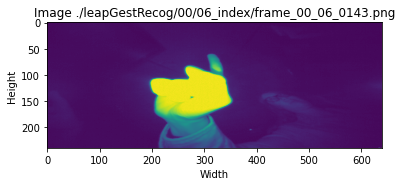

In [ ]:
plot_image(imagepaths[100])

In [ ]:
X = []
y = []
for path in imagepaths[:20000]:
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (128,128)) # Reduce image size so training can be faster
  X.append(img)
  # Processing label in image path
  category = path.split("/")[3]
  label = int(category.split("_")[0][1])
  y.append(label)
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths[:20000]), 128, 128, 1)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0])

Images loaded:  20000
Labels loaded:  20000
6 ./leapGestRecog/00/06_index/frame_00_06_0154.png


In [ ]:
ts = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
len(X_train)

14000

In [ ]:
# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras import layers

In [ ]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary( )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 354s - loss: 0.0241 - accuracy: 0.9938 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 2/5
219/219 - 354s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 3/5
219/219 - 353s - loss: 9.8166e-04 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 4/5
219/219 - 353s - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0103 - val_accuracy: 0.9970
Epoch 5/5
219/219 - 352s - loss: 0.0187 - accuracy: 0.9949 - val_loss: 0.0045 - val_accuracy: 0.9997


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

188/188 [==============================] - 35s 188ms/step - loss: 0.0045 - accuracy: 0.9997
Test accuracy: 99.97%


In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.argmax(predictions[0]), y_test[0]

(8, 8)

In [ ]:
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()


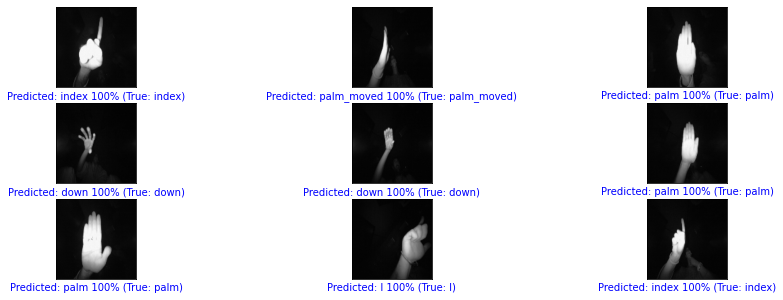

In [ ]:
validate_9_images(predictions, y_test, X_test)

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])


,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,604,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,596,0,0,0,0,0,0,0,0
Actual L,0,0,621,0,0,0,0,0,0,0
Actual Fist (H),0,0,0,568,0,0,0,0,0,0
Actual Fist (V),0,0,0,0,618,0,0,0,0,0
Actual Thumbs up,0,0,0,1,0,585,0,0,0,0
Actual Index,0,0,0,0,0,0,605,0,0,0
Actual OK,0,0,0,0,0,0,0,611,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,591,0
Actual C,0,0,0,0,1,0,0,0,0,599


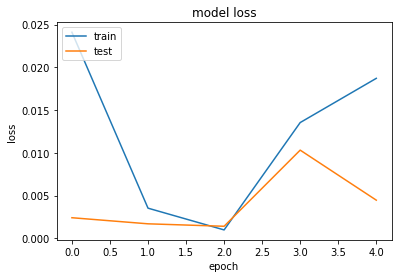

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

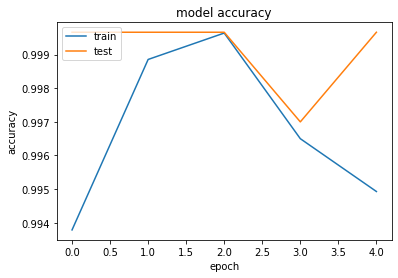

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()